In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 501kB 45.6MB/s 
     |████████████████████████████████| 4.3MB 45.3MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
img_width = 64
img_height = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [0]:
train_data_generator = datagen.flow_from_directory(directory='//content/Malaria-Classification-Using-CNN/malaria-dataset',target_size=(img_width,img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training')

Found 22048 images belonging to 2 classes.


In [0]:
validation_data_generator = datagen.flow_from_directory(directory='//content/Malaria-Classification-Using-CNN/malaria-dataset',target_size=(img_width,img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation')

Found 5510 images belonging to 2 classes.


In [0]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
validation_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

##BUILD CNN MODEL

In [0]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=(img_width,img_height,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

##COMPILE MODEL

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

##FIT MODEL

In [0]:
history = model.fit_generator(generator=train_data_generator,steps_per_epoch=len(train_data_generator),epochs=5,
                              validation_data=validation_data_generator,validation_steps = len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 159s 115ms/step - loss: 0.5032 - accuracy: 0.7568 - val_loss: 0.2843 - val_accuracy: 0.9165
Epoch 2/5
1378/1378 [==============================] - 159s 115ms/step - loss: 0.2410 - accuracy: 0.9261 - val_loss: 0.1883 - val_accuracy: 0.9314
Epoch 3/5
1378/1378 [==============================] - 159s 115ms/step - loss: 0.1997 - accuracy: 0.9313 - val_loss: 0.1895 - val_accuracy: 0.9341
Epoch 4/5
1378/1378 [==============================] - 160s 116ms/step - loss: 0.1856 - accuracy: 0.9401 - val_loss: 0.1740 - val_accuracy: 0.9356
Epoch 5/5
1378/1378 [==============================] - 158s 115ms/step - loss: 0.1736 - accuracy: 0.9429 - val_loss: 0.1716 - val_accuracy: 0.9446


In [0]:
history.history

{'accuracy': [0.7568487, 0.9260704, 0.93133163, 0.9400853, 0.9429427],
 'loss': [0.5032311821726783,
  0.24099062245706818,
  0.1997384600137213,
  0.18557176954641463,
  0.17362747167497983],
 'val_accuracy': [0.9165154, 0.93139744, 0.93411976, 0.9355717, 0.9446461],
 'val_loss': [0.2843350874664991,
  0.18826112811440143,
  0.18947849573324557,
  0.17397125348502743,
  0.17157979525517728]}

##PLOTTING LEARNING CURVE

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

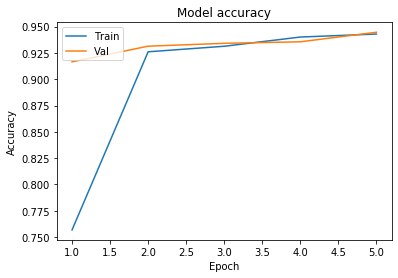

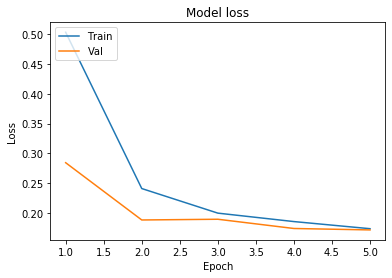

In [0]:
plot_learningCurve(history, 5)